In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [4]:
##drop month,day and year
df.drop(['day','month','year'],axis=1,inplace=True)

### Seperating the dependent and independent features

In [5]:
X=df.drop('FWI',axis=1)

# FWI (Fire Weather Index is our target Feature)
y=df['FWI']

X.shape ,y.shape

((243, 11), (243,))

In [6]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


### Split the dataset into Traing and testing data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

## Check for multicollinearity

<Axes: >

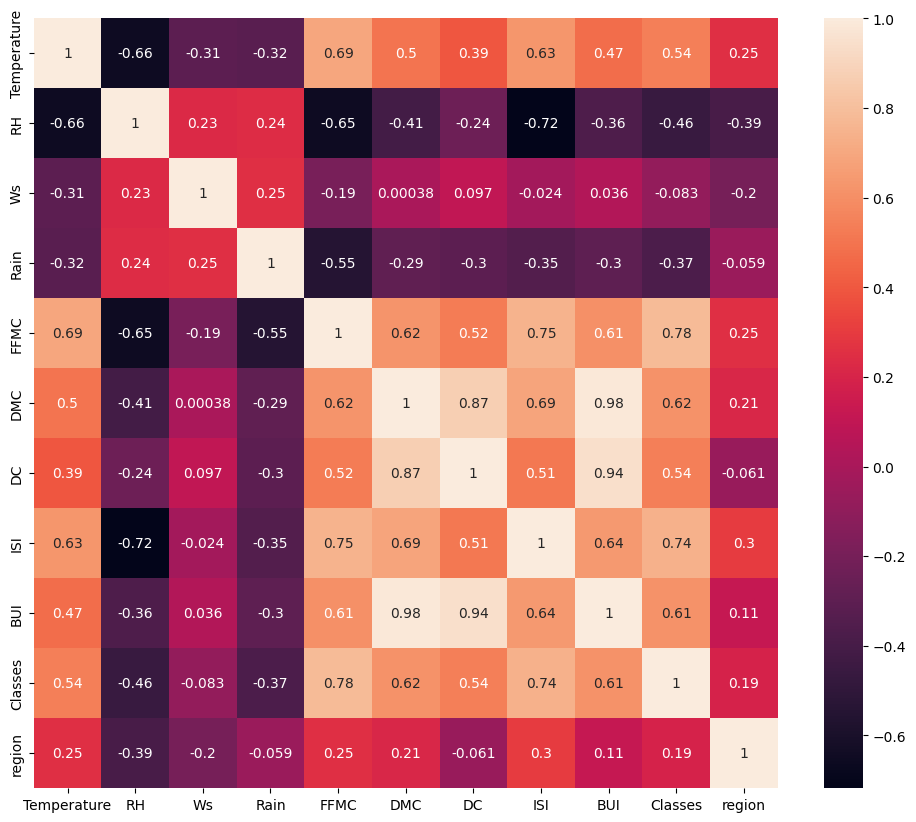

In [9]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [10]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [11]:
# Function for checking multicollinearity

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train,0.85)   # threshold decided by the--Domain expertise
corr_features      # these features can be removed from the data set due to multicollinearity concept

{'BUI', 'DC'}

In [13]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

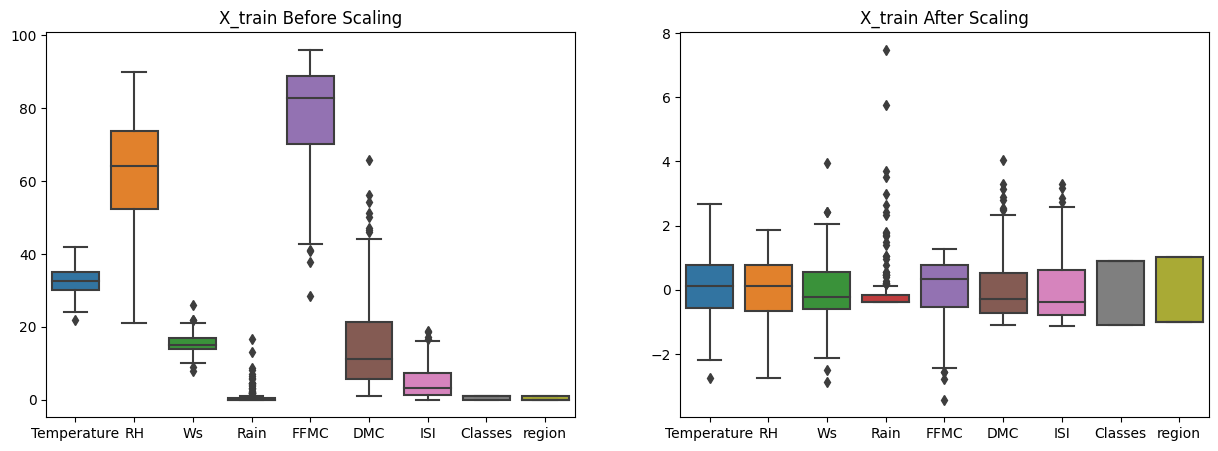

In [15]:
## Box Plots To understand Effect Of Standard Scaler

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.xticks(np.arange(9), X_train.columns)
plt.title("X_train After Scaling")

plt.show()

# After Standarization we can objerve that all feature comes in same scale 

In [16]:
dfff = pd.DataFrame(columns = ["model","mae","accuracy"])

## Linear Regression Model

Mean absolute error:  0.546823646524997
R2 Score or accuracy:   0.9847657384266951


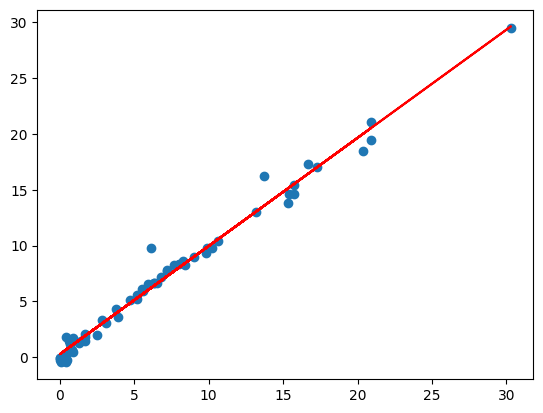

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error      # due to there are outliers present in dataset

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_Scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 Score or accuracy:  ", score)



plt.scatter(y_test,y_pred)

dfff.loc[len(dfff)] = {"model":"linreg","mae":mae,"accuracy":score}

# Trend line

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Trendline')
plt.show()

## Lasso Regression (L1 regularization)
lasso regression is a versatile technique used for feature selection and regularization

Mean absolute error:  1.133175994914409
R2 Score or accuracy:   0.9492020263112388


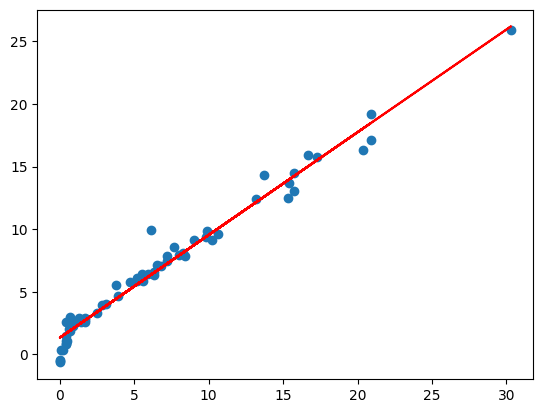

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso()    # alpha = 1 -->> default value
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_Scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 Score or accuracy:  ", score)

dfff.loc[len(dfff)] = {"model":"lasso","mae":mae,"accuracy":score}

plt.scatter(y_test,y_pred)

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Trendline')
plt.show()

## Lasso cross-validation Regression
It's automate the process of selecting the optimal alpha value through cross-validation. LassoCV uses k-fold cross-validation (where k is specified by the cv parameter, with a default value of 5) to evaluate the performance of the Lasso regression model for each alpha value. It divides your dataset into k subsets, trains the model on k-1 subsets, and evaluates its performance on the held-out subset. This process is repeated for each alpha. After cross-validation, LassoCV selects the alpha value that resulted in the best cross-validated performance. 

Mean absolute error 0.6199701158263431
R2 Score 0.9820946715928275
Optimal Alpha: 0.05725391318234408


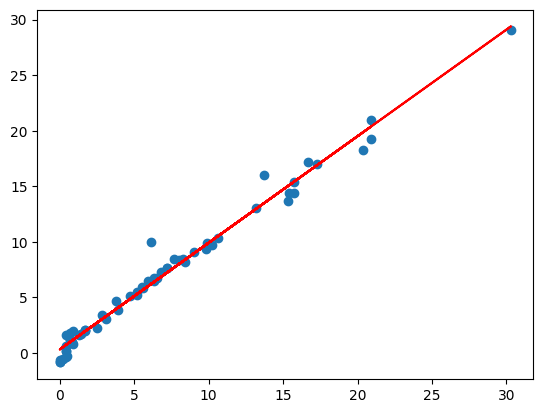

In [19]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

y_pred = lassocv.predict(X_test_Scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
print("Optimal Alpha:", lassocv.alpha_)

dfff.loc[len(dfff)] = {"model":"lassocv","mae":mae,"accuracy":score}

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Trendline')
plt.show()

## Ridge Regression cross-validication model ( L2 regularization )
It is a linear regression technique used to prevent overfitting by adding a penalty term to the linear regression cost function. It's help to reducing the impact of high value coefficients and risk of overfitting. It can also handle the problem of multicolinarity.

Mean absolute error 0.5642305340105691
R2 Score 0.9842993364555513
Optimal Alpha: 1.0


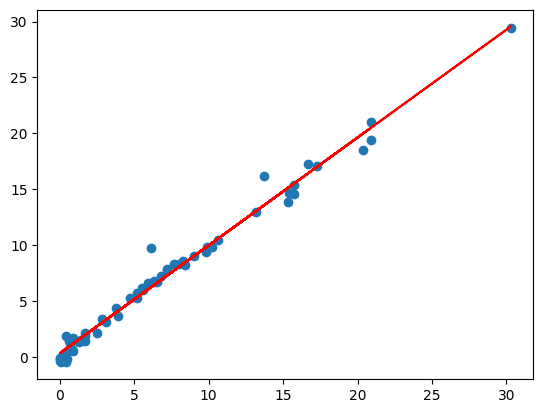

In [20]:
# Ridge Cross-Validication Regression Model

from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

y_pred = ridgecv.predict(X_test_Scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
print("Optimal Alpha:", ridgecv.alpha_)

dfff.loc[len(dfff)] = {"model":"ridgecv","mae":mae,"accuracy":score}

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Trendline')
plt.show()

##### RidgeCv and Ridge model performance are same, optimal alpha = 1.0

## Elasticnet Cross Validication Model
Elastic Net is a linear regression technique that combines both L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting and select relevant features. Cross-validation is used to assess the model's performance and choose the best hyperparameters.

Mean absolute error 0.6575946731430901
R2 Score 0.9814217587854941
Optimal Alpha: 0.04311146156383891


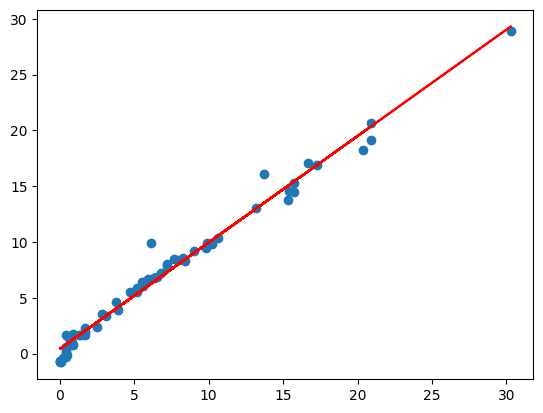

In [21]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_Scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Optimal Alpha:", elasticcv.alpha_)

dfff.loc[len(dfff)] = {"model":"elasticcv","mae":mae,"accuracy":score}

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Trendline')
plt.show()

In [22]:
dfff

,model,mae,accuracy
0,linreg,0.546824,0.984766
1,lasso,1.133176,0.949202
2,lassocv,0.619970,0.982095
3,ridgecv,0.564231,0.984299
4,elasticcv,0.657595,0.981422


### After objerve the accuracy and mae of diffrent diffrent linear regression model, we choose ridgecv model  for predication because of it's high accuracy and low mae and due to it's reduce the risk of overfitting. 

In [23]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgecv,open('ridge.pkl','wb'))